## 1. What data do you have?
We have data collected from students in CS105, CS10C and CS111, and we are interested in finding out how often they use ChatGPT, whether they pay for a subscription towards an AI language model and how it affects their overall academic performace.


# 2. What would you like to know?  
We would like to know how often students use AI language models, whether that is directly towards their assignments, for recreational purposes, or simply as an aid in getting their work done. We also want to know how it affects students' academic performance when measured by GPA. We would like to know if it has a direct impact on academic performance, a small impact or no impact at all, and finally how it would affect a students' academic performance in the long run.

###What data do you have?
We have data collected from students in CS105, CS10C and CS111, and we are interested in finding out how often they use ChatGPT and how it affects their overall academic performace.

List the variables or columns of interest without writing out all their options. The columns of interest look like this:
- Which AI tool do you primarily use? (string)   
- How frequently do you use ChatGPT or other AI language models on your assignments? (ai's name or NA)
- Do you believe ChatGPT helps you complete your assignments? (yes/no)
- How helpful has ChatGPT been to your overall productivity?    (range of values)
- How helpful has ChatGPT been to your overall academic performance?    (range of values)
- What types of tasks do you normally use ChatGPT or another AI language model to complete? (string)
- What is your major (major name)
- What is your current cumulative gpa (range of values)
- How many hours a week do you spend working a job? (range of values)
- What does your weekend mostly look like? (string)
- Do you pay for a stronger AI language model like ChatGPT4 with a subscription? (yes/no)
- How often do you attend classes? (range of values)
- How much free time would you say you have a day on average? (range of vaues)



In [ ]:
import pandas as pd

file_path = 'data.csv'
df = pd.read_csv(file_path)

print(df.head())

           Timestamp  \
0  4/30/2024 8:29:47   
1  4/30/2024 8:40:53   
2  4/30/2024 9:05:47   
3  4/30/2024 9:05:52   
4  4/30/2024 9:37:48   

  What class are you filling out this survey for? Select all that apply.  \
0                                              CS105                       
1                                              CS105                       
2                                       CS105, CS111                       
3                                              CS105                       
4                                              CS105                       

  What is your current class standing? What is your major/minor?  \
0                               Senior                  CS major   
1                               Junior                  CS major   
2                               Junior        Data Science major   
3                               Junior            CS or DS minor   
4                               Senior            CS or DS

# GRAPH 1 - AI Tool Usage Frequency vs GPA (Point Plot)

['Everyday' 'Sometimes' 'Rarely/Never' 'A couple times a week' nan
 'Once a week' 'Prefer not to say']


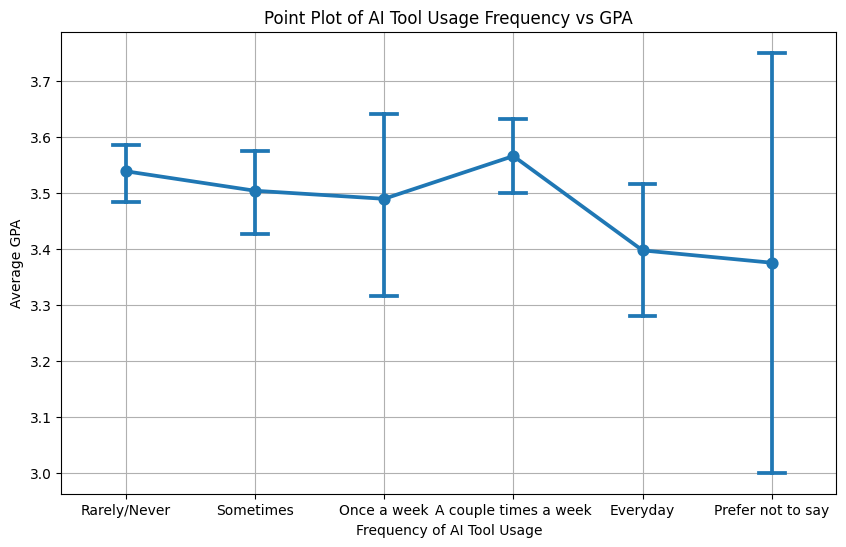

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#change gpa range to avg of gpa which are num values
gpa_map = {
    "2.50 - 2.99": 2.75,
    "3.00 - 3.49": 3.25,
    "3.50 - 4.00": 3.75
}
df['GPA_score'] = df['What is your current cumulative GPA'].map(gpa_map)
print(df['How frequently do you use ChatGPT or other AI language models on your assignments?'].unique())

custom_order = ['Rarely/Never', 'Sometimes', 'Once a week', 'A couple times a week', 'Everyday', 'Prefer not to say']
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='How frequently do you use ChatGPT or other AI language models on your assignments?', y='GPA_score',
              order=custom_order, capsize=.2)
plt.title('Point Plot of AI Tool Usage Frequency vs GPA')
plt.xlabel('Frequency of AI Tool Usage')
plt.ylabel('Average GPA')
plt.grid(True)
plt.show()

### Interpretation
**Point Plot Graph**

The point plot is suggesting that low to moderate use of AI tool usage correlates with higher average GPA.  We see a notable decline in average GPA from students who use these AI tools everyday.

# GRAPH 2 - ChatGPT Usage vs Major (Heat Map)

In [ ]:
def categorize_major(major):
    major = major.strip().lower()
    if 'csba' in major or 'switch into csba' in major or 'transitioning to csba' in major:
        return 'CSBA'
    elif 'cs' in major or 'computer science' in major:
        if 'data science' not in major:
            return 'Computer Science'
    elif 'data science' in major or 'switch to ds' in major:
        return 'Data Science'
    elif 'robotic' in major:
        return 'Robotics'
    elif 'math' in major:
        return 'Mathematics'
    elif 'bio' in major:
        return 'Biology'
    elif 'engineering' in major and 'robotic' not in major and 'csba' not in major:
        return 'Engineering (Non-CS/Robotics)'
    elif 'econ' in major:
        return 'Economics'
    elif 'undeclared' in major or 'undecleard' in major:
        return 'Undeclared/Other'
    else:
        return 'Other'

# test categorize_major on hard datapoints found in the dataset
print(categorize_major('CS major transitioning to csba'))
print(categorize_major('Bioengineering '))
print(categorize_major('Statistics but considering a switch to DS (+ CS minor)'))

CSBA
Biology
Computer Science


In [ ]:
df['Simplified major'] = df['What is your major/minor?'].apply(categorize_major)

print("Simplified Major Column, compared to original\n\n",df[['What is your major/minor?', 'Simplified major']])

Simplified Major Column, compared to original

     What is your major/minor?  Simplified major
0                    CS major  Computer Science
1                    CS major  Computer Science
2          Data Science major      Data Science
3              CS or DS minor  Computer Science
4              CS or DS minor  Computer Science
..                        ...               ...
354                  CS major  Computer Science
355         Mathematics major  Computer Science
356                  CS major  Computer Science
357                  Robotics  Computer Science
358                CSBA major              CSBA

[359 rows x 2 columns]


In [ ]:
pivot_table = df.pivot_table(index='Simplified major', columns='How frequently do you use ChatGPT or other AI language models on your assignments?', aggfunc='size', fill_value=0)
pivot_table

How frequently do you use ChatGPT or other AI language models on your assignments?,A couple times a week,Everyday,Once a week,Prefer not to say,Rarely/Never,Sometimes
Simplified major,,,,,,
Biology,3,0,0,1,0,0
CSBA,8,2,6,0,21,8
Computer Science,52,10,12,3,87,47
Data Science,17,5,3,1,13,9
Economics,0,0,0,0,0,1
Other,7,1,2,0,18,7
Robotics,0,0,1,0,0,0
Undeclared/Other,0,0,0,0,2,1


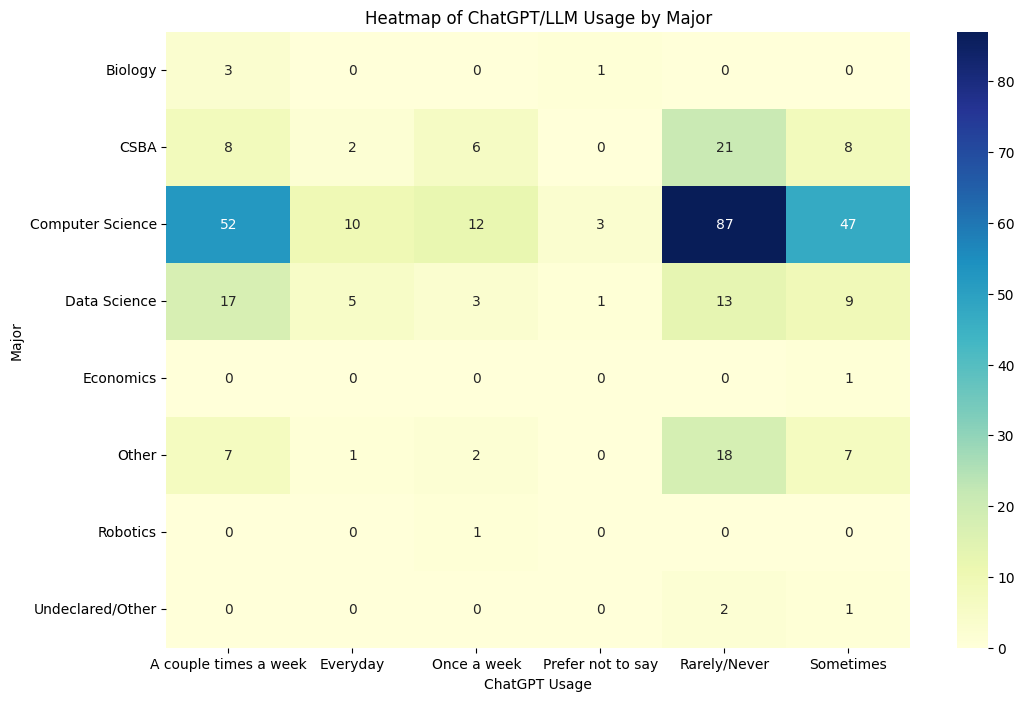

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of ChatGPT/LLM Usage by Major')
plt.xlabel('ChatGPT Usage')
plt.ylabel('Major')
plt.show()

### Interpretation
From the heatmap, we see that Computer Science students show the highest frequency of using ChatGPT "Everyday", which is a lot higher compared to other majors. This indicates a strong use of AI tools by computer science and may be due to LLM's being a subset of the field of computer science.  Students in computer science may be more aware of AI tools than students in other majors.

The majority of students rarely if ever or only sometimes use ai on their assignments.

# GRAPH 3 - Paying for AI Models vs GPA (Stacked Bar Chart)

In [ ]:
# change gpa ranges to  num values
gpa_map = {
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75,
    'Prefer not to say': None  # Prefer not to say' = NaN for numerical analysis
}

# apply mapping to create a new numeric GPA column
df['GPA Numeric'] = df['What is your current cumulative GPA'].map(gpa_map)

df.dropna(subset=['GPA Numeric'], inplace=True)

NameError: name 'df' is not defined

<ipython-input-8-a3452883da8b>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Do you pay for a stronger AI language model like ChatGPT4 with a subscription?',


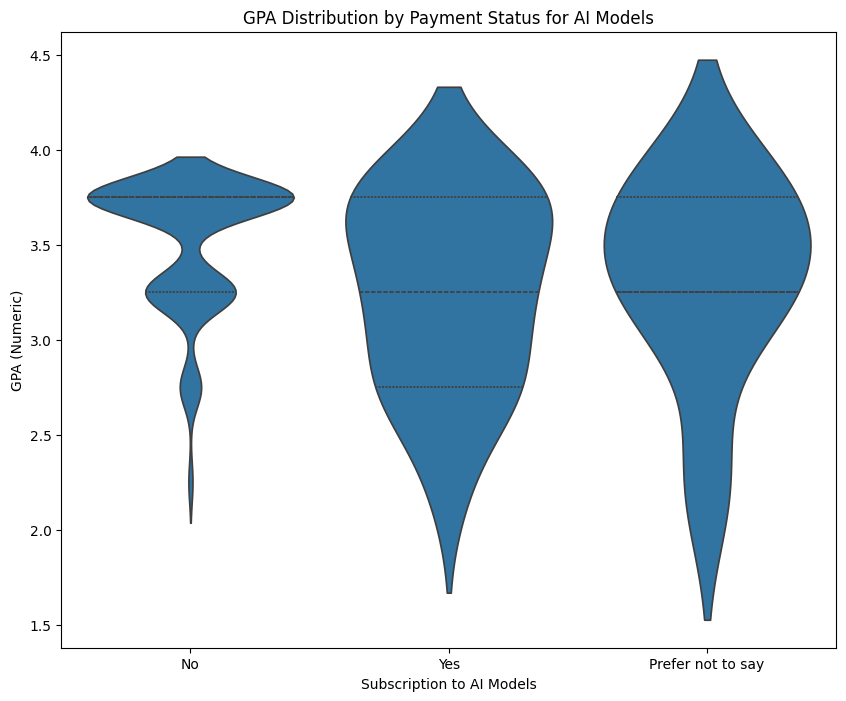

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.violinplot(x='Do you pay for a stronger AI language model like ChatGPT4 with a subscription?',
               y='GPA Numeric',
               data=df,
               inner='quartile',
               scale='width')

plt.title('GPA Distribution by Payment Status for AI Models')
plt.xlabel('Subscription to AI Models')
plt.ylabel('GPA (Numeric)')
plt.show()


### Interpretation
From the data we see here, the vast majority of students do not pay for ai models.  We can't draw any meaningful correlation between paying for ai models and your gpa because it seems like whether you pay for ai models doesn't have an impact on your gpa.

# Graph 4 - Correlation between Subscription to AI Model and Academic Performance Helpfulness (BoxPlot)


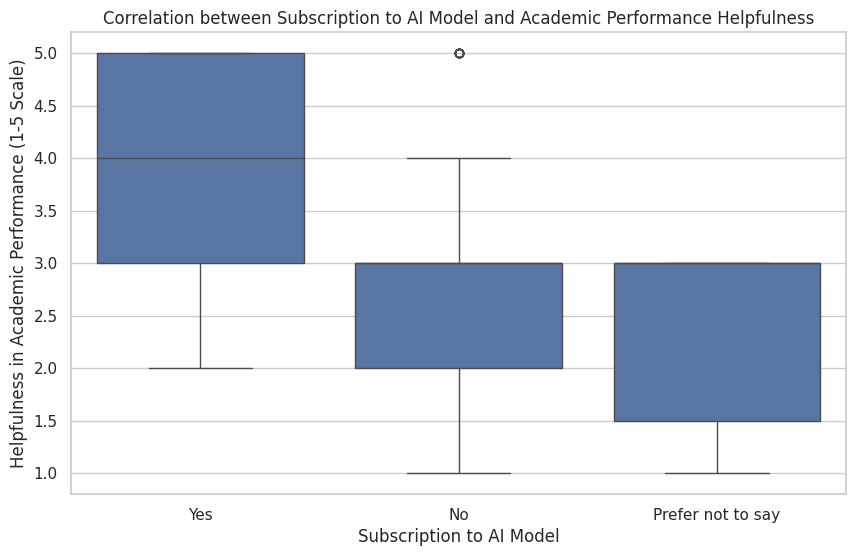

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

data["Do you pay for a stronger AI language model like ChatGPT4 with a subscription?"].fillna("No", inplace=True)
performance_column = "How helpful has ChatGPT been to your overall academic performance?"
mode_value = data[performance_column].mode()[0]
data[performance_column].fillna(mode_value, inplace=True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x="Do you pay for a stronger AI language model like ChatGPT4 with a subscription?",
            y="How helpful has ChatGPT been to your overall academic performance?",
            data=data,
            order=["Yes", "No", "Prefer not to say"])

plt.title('Correlation between Subscription to AI Model and Academic Performance Helpfulness')
plt.xlabel('Subscription to AI Model')
plt.ylabel('Helpfulness in Academic Performance (1-5 Scale)')
plt.show()


### Interpretation
- **Yes** shows a higher helpfulness and less variability. This shows that the subscription does bring benefit.
- **No** shows a lower helpfulness and wider variability. This shows that there is a lower benefit without a subscription.
- **Prefer Not to Say** responses are similar to No respones.

There is a clear trend where those who pay for the AI service perceive greater benefits.The diversity in responses among non-subscribers highlights how beneficial the subscriptions are and how it is definitely more helpful.


# Graph 5 - Helpfulness Rating of ChatGPT vs Major (Violin Plot)

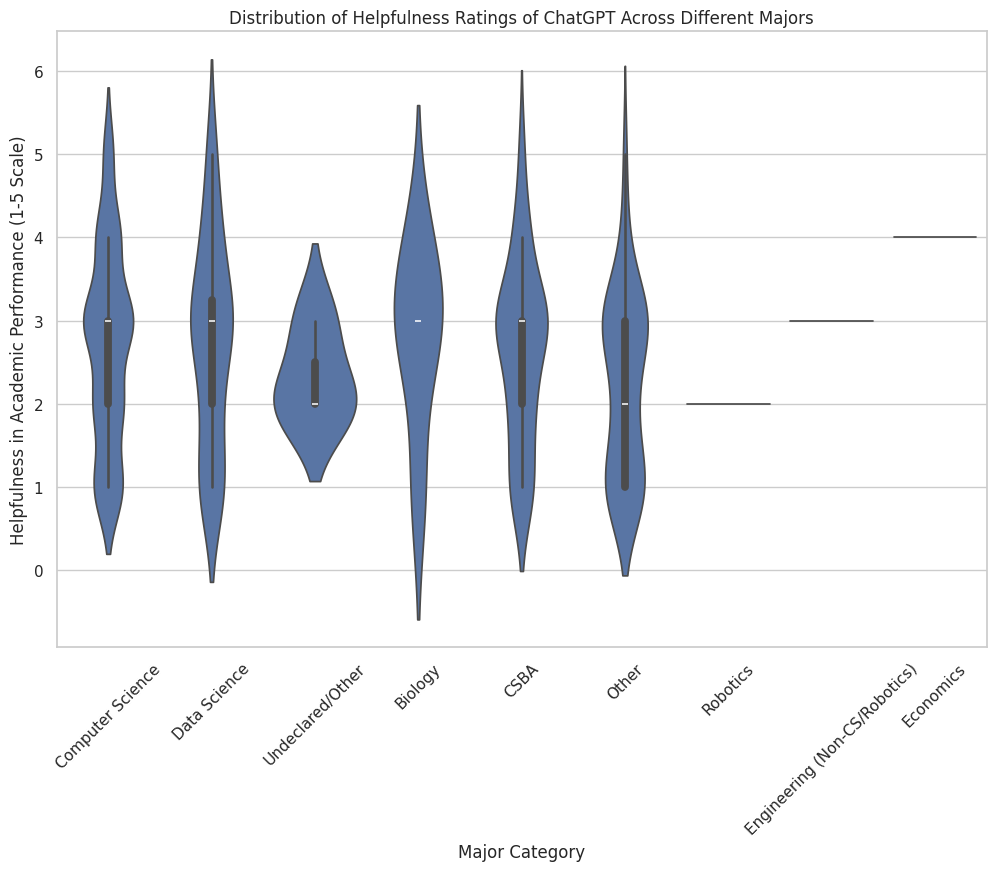

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# function to help categorize the majors
def categorize_major(major):
    major = major.strip().lower()
    if 'csba' in major or 'switch into csba' in major or 'transitioning to csba' in major:
        return 'CSBA'
    elif 'cs' in major or 'computer science' in major:
        if 'data science' not in major:
            return 'Computer Science'
    elif 'data science' in major or 'switch to ds' in major:
        return 'Data Science'
    elif 'robotic' in major:
        return 'Robotics'
    elif 'math' in major:
        return 'Mathematics'
    elif 'bio' in major:
        return 'Biology'
    elif 'engineering' in major and 'robotic' not in major and 'csba' not in major:
        return 'Engineering (Non-CS/Robotics)'
    elif 'econ' in major:
        return 'Economics'
    elif 'undeclared' in major or 'undecleard' in major:
        return 'Undeclared/Other'
    else:
        return 'Other'


data = pd.read_csv('data.csv')

data['Major Category'] = data['What is your major/minor?'].apply(categorize_major)


performance_column = 'How helpful has ChatGPT been to your overall academic performance?'
mode_value = data[performance_column].mode()[0]
data[performance_column].fillna(mode_value, inplace=True)

plt.figure(figsize=(12, 8))
sns.violinplot(x='Major Category', y=performance_column, data=data)
plt.title('Distribution of Helpfulness Ratings of ChatGPT Across Different Majors')
plt.xlabel('Major Category')
plt.ylabel('Helpfulness in Academic Performance (1-5 Scale)')
plt.xticks(rotation=45)
plt.show()


### Interpretation
**The Sample is Slightly Skewed**: The high ratings for Computer Science and closely related fields (like Data Science and CSBA) might be partly due to the survey's setting. These students are more likely to understand and value the capabilities of AI tools, impacting their responses.

The shapes of the violins show us that:

Computer Science students generally find ChatGPT very helpful.
Data Science students also show high helpfulness but with more variation than CS.
Undeclared/Other students show a moderate level of helpfulness.
Biology Students show a middle level of helpfulness. This shows that most students find it neither extremely helpful or unhelpful.
CSBA students find ChatGPT moderate to highly helpful.
Other: Similar to CSBA students (higher middle)

**Everything else:**

Not enough data!

# Graph 6 - Frequency of AI Usage vs Class Attendance (Heat Map)

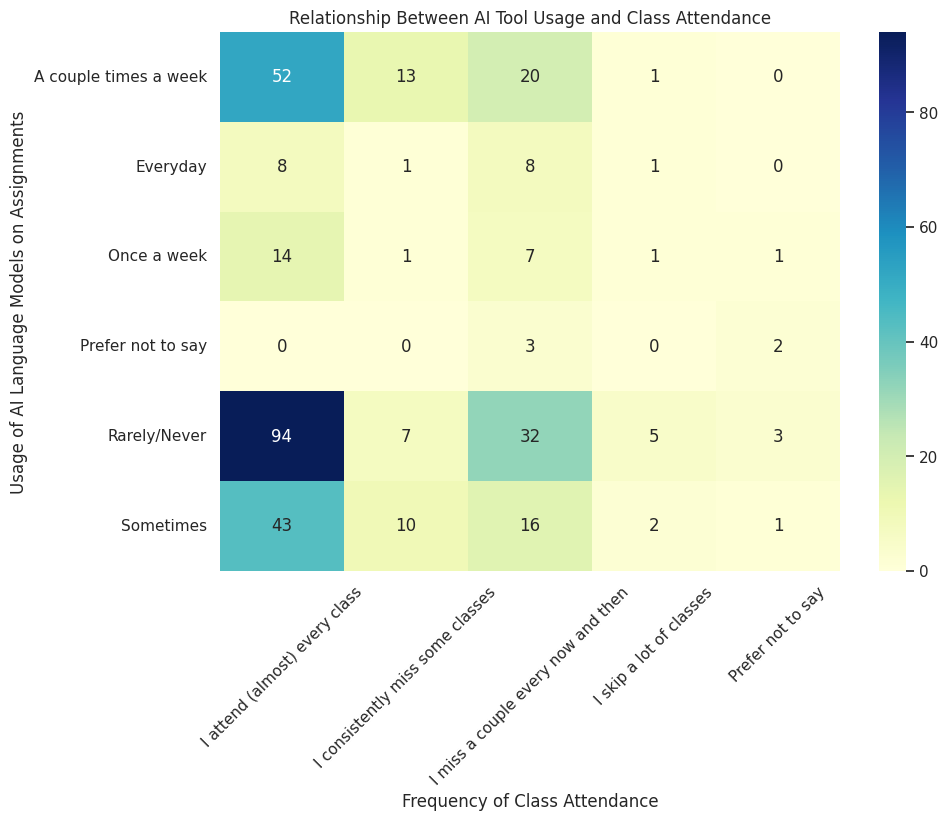

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')


ct = pd.crosstab(data['How frequently do you use ChatGPT or other AI language models on your assignments?'],
                 data['How often do you attend classes?'])

plt.figure(figsize=(10, 7))
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Relationship Between AI Tool Usage and Class Attendance')
plt.ylabel('Usage of AI Language Models on Assignments')
plt.xlabel('Frequency of Class Attendance')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Interpretation
**Possible Reliance on Traditional Learning:** It seems as though out of all the students surveyed, the vast majority of those who rarely/never use ChatGPT attend almost every class.
- Overall, it seems as though the data is pretty diverse.
- Majority of the students surveyed generally attend (almost) every class so there is potential for skewed data

# Graph 7 - Free Time vs. AI Usage (Bar Plot)


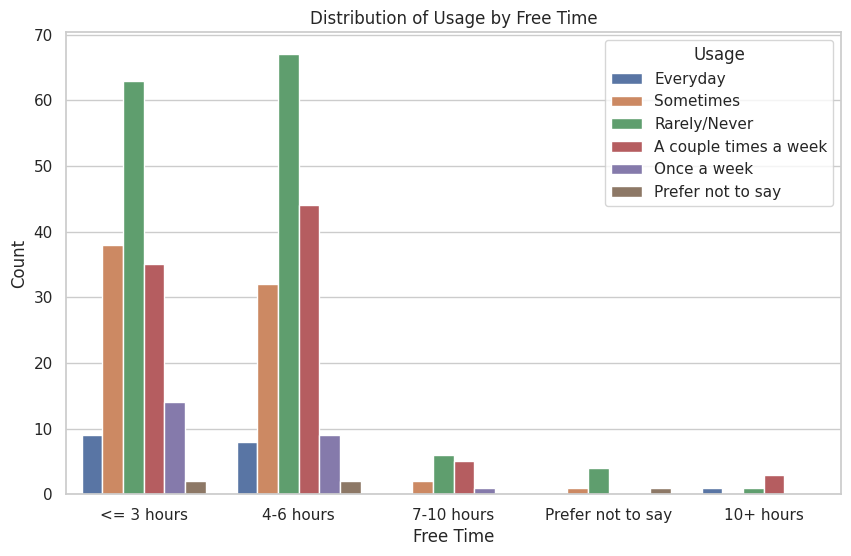

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'data.csv'
data = pd.read_csv(file_path)


data_cleaned = data.dropna(subset=['How much free time would you say you have a day on average?', 'How frequently do you use ChatGPT or other AI language models on your assignments?'])

contingency_table = pd.crosstab(data_cleaned['How much free time would you say you have a day on average?'], data_cleaned['How frequently do you use ChatGPT or other AI language models on your assignments?'])

plt.figure(figsize=(10, 6))
sns.countplot(x='How much free time would you say you have a day on average?', hue='How frequently do you use ChatGPT or other AI language models on your assignments?', data=data_cleaned)
plt.title('Distribution of Usage by Free Time')
plt.xlabel('Free Time')
plt.ylabel('Count')
plt.legend(title='Usage')
plt.show()

The plot shows that students' usage of AI language models does not depict the amout of free time they possess, as the plot seems to have the same result for all counts of free time. We could argue that students who fall under the rarely/never usage category have the most common count of free time ranging from <=3 - 6, we do not have any significant evidence to claim that usage of AI language mdoels directly affects a student's free time.

# Graph 8 - Subscription vs Free Time (Pie Chart)

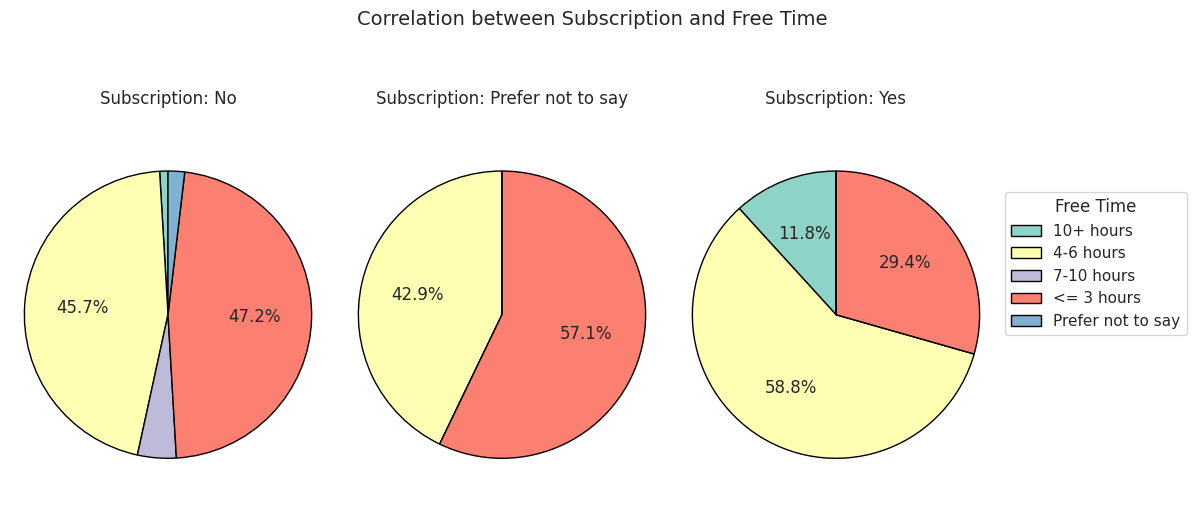

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data.csv'
data = pd.read_csv(file_path)

grouped_data = data.groupby('Do you pay for a stronger AI language model like ChatGPT4 with a subscription?')['How much free time would you say you have a day on average?'].value_counts().unstack().fillna(0)

grouped_data = grouped_data.loc[:, (grouped_data != 0).any(axis=0)]

fig, axes = plt.subplots(1, len(grouped_data), figsize=(12, 5))
colors = plt.cm.Set3.colors

#formatting to mmake pie chart look clean and hide values less than 5%
for i, (index, row) in enumerate(grouped_data.iterrows()):
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(row, labels=None, autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '', colors=colors[:len(row)], startangle=90, wedgeprops={'edgecolor': 'black'}) #Hides values below 5% for better readability of data
    ax.set_title(f'Subscription: {index}', fontsize=12)
    ax.axis('equal')

fig.legend(wedges, grouped_data.columns, title='Free Time', loc='center right')
plt.suptitle('Correlation between Subscription and Free Time', fontsize=14, y=1.05)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


### Interpretation
Judging by the results from the pie charts, we see that the highest percentage of students with 10+ hours of free time a week are those who pay for an AI language model subscription. While over 90% of people who don't pay for an AI language model have <= 3 - 10 hours of free time. Furthermore, out of the students who pay for an AI language model, 29.4% of them have <= 3, the lowest out of all three categories. Which means that those who pay for a subscription for an AI language model technically have the least amount of people with very little free time. Howevever, since the difference in percentages is not drastic, we cannot necessarily draw a correlation between the two.

# Graph 9 - Hours of Work vs Subscription to AI Models (Bar Plot)

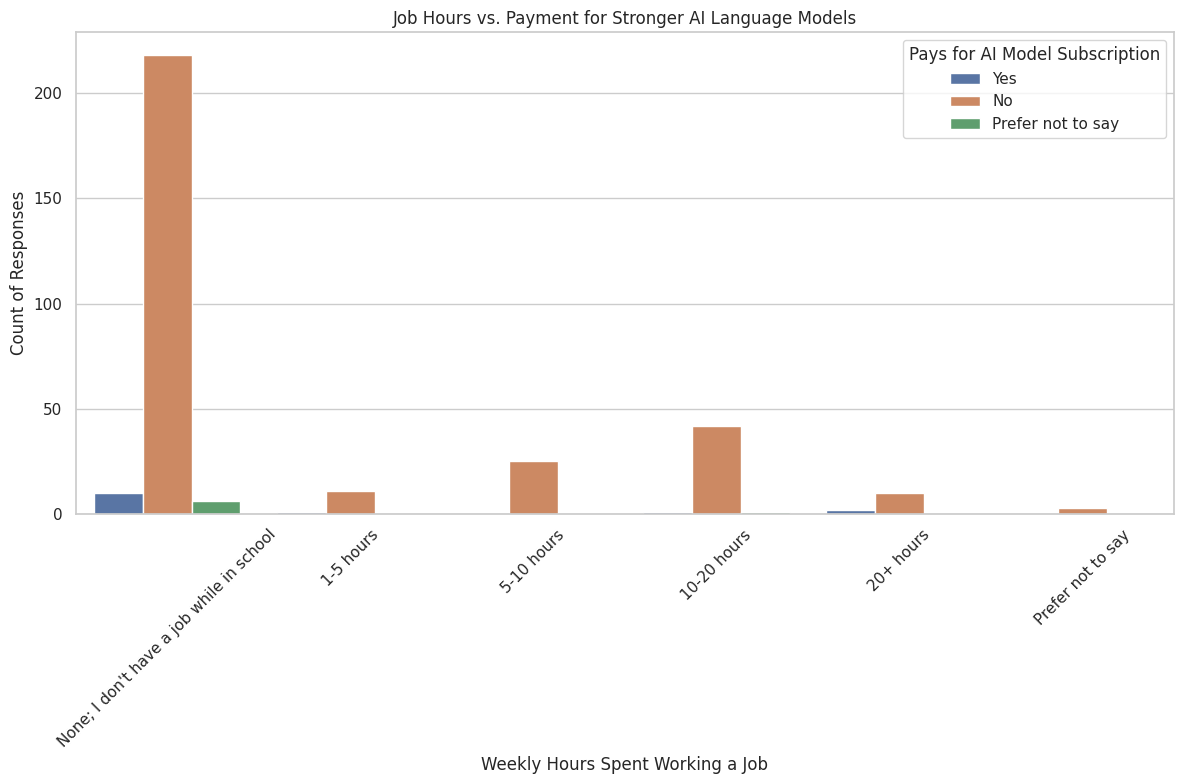

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df.dropna(subset=['How many hours a week do you spend working a job?', 'Do you pay for a stronger AI language model like ChatGPT4 with a subscription?'])

job_hours_order = ['None; I don\'t have a job while in school', '1-5 hours', '5-10 hours', '10-20 hours', '20+ hours', 'Prefer not to say']
subscription_order = ['Yes', 'No', 'Prefer not to say']

plt.figure(figsize=(12, 8))
sns.countplot(x='How many hours a week do you spend working a job?', hue='Do you pay for a stronger AI language model like ChatGPT4 with a subscription?',
              data=df, order=job_hours_order, hue_order=subscription_order)
plt.title('Job Hours vs. Payment for Stronger AI Language Models')
plt.xlabel('Weekly Hours Spent Working a Job')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)
plt.legend(title='Pays for AI Model Subscription')
plt.tight_layout()
plt.show()

This graph shows how many hours students work each week alongside whether they pay for a stronger AI language model like ChatGPT4. We can see that most students who don't work are also the ones not paying for the subscription, and as work hours increase, fewer students opt to pay for the AI subscription.

# Graph 10 - Hours Worked vs Frequency of AI Usage (Stacked Bar Chart)

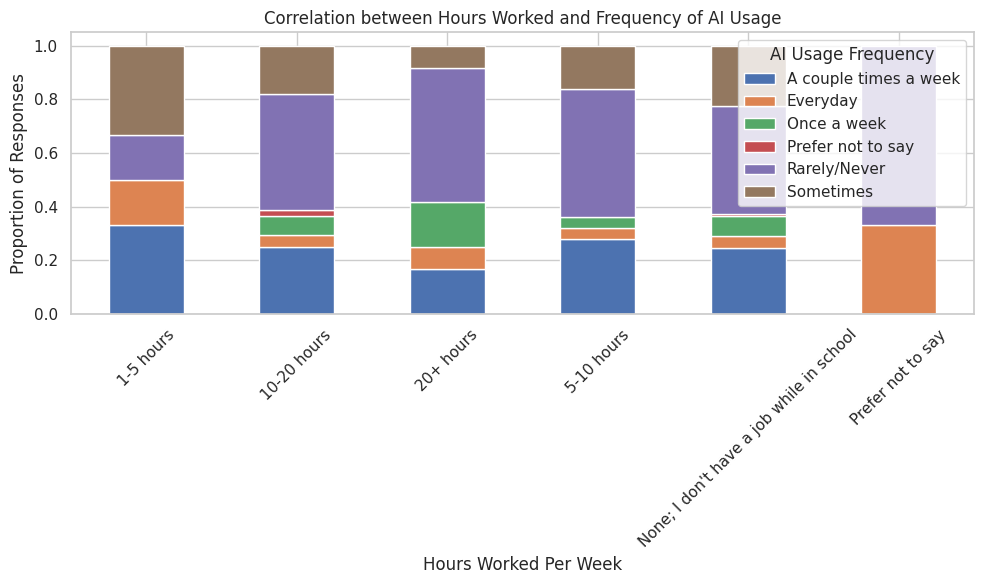

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data_crosstab = pd.crosstab(df['How many hours a week do you spend working a job?'],
                            df['How frequently do you use ChatGPT or other AI language models on your assignments?'],
                            rownames=['Hours Worked'],
                            colnames=['AI Usage Frequency'],
                            normalize='index')  # normalize by rows to see proportions

data_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Correlation between Hours Worked and Frequency of AI Usage')
plt.ylabel('Proportion of Responses')
plt.xlabel('Hours Worked Per Week')
plt.xticks(rotation=45)
plt.legend(title='AI Usage Frequency')
plt.tight_layout()
plt.show()

This stacked bar graph helps us visualize that despite the smount of hours one works or even if they do not have a job while they're in school it does not affect their usage of AI language models, as the distribution seems to be more or less the same fro all categories of hours worked.

# Graph 11 - Weekend Activities vs AI Usage (Heat Map)

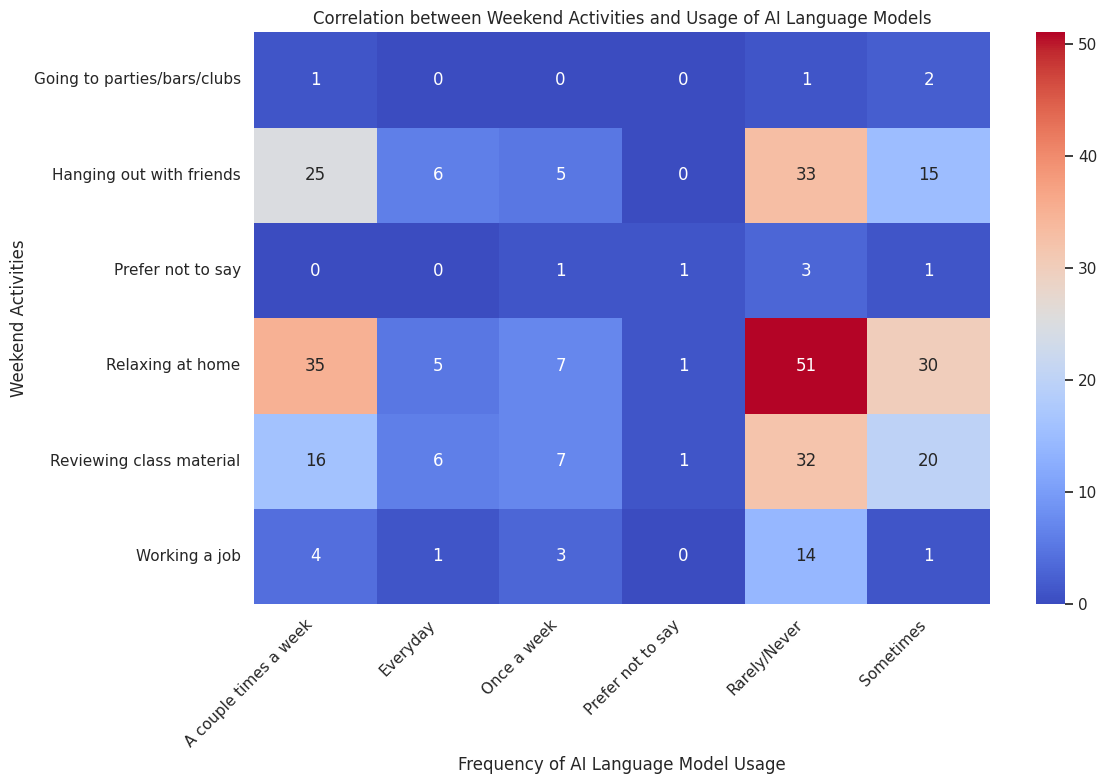

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


contingency_table = pd.crosstab(df['What does your weekend mostly look like?'],
                                df['How frequently do you use ChatGPT or other AI language models on your assignments?'])


plt.figure(figsize=(12, 8))
ax = sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
ax.set_title('Correlation between Weekend Activities and Usage of AI Language Models')
ax.set_xlabel('Frequency of AI Language Model Usage')
ax.set_ylabel('Weekend Activities')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

This heatmap displays the correlation between weekend activities and the frequency of AI usage among the students. It shows that there isn’t really a correlation between weekend activities and AI model usage.

# Question 4/5 Hypothesis Testing

# HYPOTHESIS 1

Null Hypothesis (H0): There is no association between subscribing to a stronger AI model and theperceived helpfulness of ChatGPT in academic performance.

Alternative Hypothesis (H1): There is an association between subscribing to a stronger AI model and the perceived helpfulness of ChatGPT in academic performance.


## Chi-Squared Test
The Chi-Squared test is a test used to determine if there is a significant statistical association between two variables which are categorical.  The Chi-Squared test calculates a statistic that shows how much the observed counts differ from the expected counts if there was no relationship. It then uses this statistic to give a p-value, which tells us whether the differences are big enough to be statistically significant or if they may be due to random chance instead.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

data = pd.read_csv('data.csv')

#contingency table
contingency_table = pd.crosstab(
    data['Do you pay for a stronger AI language model like ChatGPT4 with a subscription?'],
    data['How helpful has ChatGPT been to your overall academic performance?']
)

#chi-square test of independence
chi_stat, chi_p, chi_dof, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test Statistic: {chi_stat}, P-value: {chi_p}")

if chi_p < 0.05:
    print("We reject the null hypothesis because there is a significant association between subscription to AI models and perceived academic performance help.")
else:
    print("We fail to reject the null hypothesis because there is no significant association detected.")


Chi-Square Test Statistic: 30.96767980453796, P-value: 0.00014237645548456531
We reject the null hypothesis because there is a significant association between subscription to AI models and perceived academic performance help.


The Chi-Square Test Statistic calculated was 30.96767980453796 the P-value was 0.00014237645548456531. Since the P-value is less than 0.05, we reject the null hypothesis (H0). We conclude that there is a significant association between subscription to AI models and the perceived helpfulness of ChatGPT in academic performance.

##Pearson Correlation Test
The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 to 1, where 1 means a perfect positive linear relationship, -1 means a perfect negative linear relationship, and 0 indicates no linear relationship.


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

payment_map = {'Yes': 1, 'No': 0, 'Prefer not to say': -1}

data['Helpfulness_numeric'] = data['How helpful has ChatGPT been to your overall academic performance?']
data['Payment_numeric'] = data['Do you pay for a stronger AI language model like ChatGPT4 with a subscription?'].map(payment_map)

# drop nan rows
data_cleaned = data.dropna(subset=['Helpfulness_numeric', 'Payment_numeric'])

#if data is enough do pearson correlation
if len(data_cleaned) >= 2:
    correlation, p_value = pearsonr(data_cleaned['Helpfulness_numeric'], data_cleaned['Payment_numeric'])
    print(f"Pearson Correlation Coefficient: {correlation}, P-value: {p_value}")

    if p_value < 0.05:
        print("We reject the null hypothesis because there is a significant linear relationship between subscription to AI models and perceived academic performance help.")
    else:
        print("We fail to reject the null hypothesis because there is no significant linear relationship detected.")
else:
    print("Not enough data to perform Pearson correlation.")


Pearson Correlation Coefficient: 0.23303517945469868, P-value: 1.3771674209564526e-05
We reject the null hypothesis because there is a significant linear relationship between subscription to AI models and perceived academic performance help.


The Pearson Correlation Coefficient was 0.23303517945469868 and our P-value was 1.3771674209564526e-05. The P-value is significantly below 0.05 so we reject the null hypothesis which is indicating that there is a significant linear relationship between subscribing to AI models and the perceived helpfulness of these tools in academic performance.

# Hypothesis 2

#### Null Hypothesis (H0): There is no correlation between paying for AI models and GPA.
#### Alternative Hypothesis (H1): There is a correlation between paying for AI models and GPA.

In [ ]:
import pandas as pd

gpa_map = {
    '2.00 - 2.49': 2.25,  #change gpa ranges into numeric values to make it easier to analyze
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}
df['GPA_Numeric'] = df['What is your current cumulative GPA'].map(gpa_map)

# change  payment status to numeric values
pay_map = {
    'Yes': 1,
    'No': 0,
    'Prefer not to say': None
}
df['Pay Numeric'] = df['Do you pay for a stronger AI language model like ChatGPT4 with a subscription?'].map(pay_map)

df['Pay Numeric'] = df['Pay Numeric'].fillna(-1)  # Change nan to -1 if missing data needs a values

df.head()

,Timestamp,What class are you filling out this survey for? Select all that apply.,What is your current class standing?,What is your major/minor?,"If you do have a double major please specify below. Otherwise please enter ""None""",What is your current cumulative GPA,What is your age?,What is your height?,What is your ethnicity?,What gender do you identify as?,...,Are you a dog or cat person,How often do you eat out?,How often do you eat breakfast?,What is your favorite chocolate,Should the mascot of UCR be changed to the donkey?,GPA_score,Simplified major,GPA Numeric,GPA_Numeric,Pay Numeric
0,4/30/2024 8:29:47,CS105,Senior,CS major,NaN,3.00 - 3.49,20-22,5’0”,Asian,Female,...,Dog,NaN,Every day,Dark chocolate,NaN,3.25,Computer Science,3.25,3.25,0.0
1,4/30/2024 8:40:53,CS105,Junior,CS major,NaN,3.50 - 4.00,20-22,"5'8""",White,Male,...,Dog,0-3 times a week,Every day,Milk chocolate,Yes - no more Scotty,3.75,Computer Science,3.75,3.75,0.0
2,4/30/2024 9:05:47,"CS105, CS111",Junior,Data Science major,NaN,3.00 - 3.49,18-20,178cm,Asian,Male,...,Neither,0-3 times a week,Never,Milk chocolate,No - Scotty can do no wrong,3.25,Data Science,3.25,3.25,0.0
3,4/30/2024 9:05:52,CS105,Junior,CS or DS minor,NaN,3.50 - 4.00,18-20,6’3,Asian,Male,...,Dog,0-3 times a week,Every day,Milk chocolate,No - Scotty can do no wrong,3.75,Computer Science,3.75,3.75,0.0
4,4/30/2024 9:37:48,CS105,Senior,CS or DS minor,economics major,3.50 - 4.00,20-22,5 ft,Asian,Non-binary,...,Both,0-3 times a week,Sometimes,Dark chocolate,Yes - no more Scotty,3.75,Computer Science,3.75,3.75,0.0


## Chi-Squared Test
The Chi-Squared test is a test used to determine if there is a significant statistical association between two variables which are categorical.  The Chi-Squared test calculates a statistic that shows how much the observed counts differ from the expected counts if there was no relationship. It then uses this statistic to give a p-value, which tells us whether the differences are big enough to be statistically significant or if they may be due to random chance instead.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df['GPA Numeric'], df['Pay Numeric'])

chi_stat, chi_p, chi_dof, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test Statistic: {chi_stat}, P-value: {chi_p}")

if chi_p < 0.05:
    print("We reject the null hypothesis because there is a significant association between paying for AI models and GPA.")
else:
    print("We fail to reject the null hypothesis because there is no significant association detected between paying for AI models and GPA.")


Chi-Square Test Statistic: 15.297782260920185, P-value: 0.018062880473428508
We reject the null hypothesis because there is a significant association between paying for AI models and GPA.


The Chi-Square Test Statistic calculated was 15.297782260920185 and the P-value was 0.018062880473428508. Since the P-value is less than 0.05, we reject the null hypothesis (H0).  We conclude that there is a significant association between paying for AI models and GPA.

##Pearson Correlation Test
The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 to 1, where 1 means a perfect positive linear relationship, -1 means a perfect negative linear relationship, and 0 indicates no linear relationship.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

df['Pay Numeric'] = df['Do you pay for a stronger AI language model like ChatGPT4 with a subscription?'].map({'Yes': 1, 'No': 0})

df_cleaned = df.dropna(subset=['GPA Numeric', 'Pay Numeric'])

correlation, p_value = pearsonr(df_cleaned['GPA Numeric'], df_cleaned['Pay Numeric'])
print(f"Pearson Correlation Coefficient: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis because there is a significant linear relationship between paying for AI models and GPA.")
else:
    print("We fail to reject the null hypothesis because there is no significant linear relationship detected between paying for AI models and GPA.")


Pearson Correlation Coefficient: -0.13909005900496635, P-value: 0.012341111246252602
We reject the null hypothesis because there is a significant linear relationship between paying for AI models and GPA.


The Pearson Correlation Coefficient was -0.13909005900496635 with a P-value of 0.012341111246252602. The P-value is below 0.05 so we reject the null hypothesis.  This indicates that there is a significant linear relationship between paying for AI models and GPA. This negative correlation suggests that as payment for AI models increases, there may be a slight decrease in GPA.

# HYPOTHESIS 3

Null Hypothesis (H0): There is no correlation between the frequency of ChatGPT usage and GPA scores.
Alternative Hypothesis (H1): There is a correlation between the frequency of ChatGPT usage and GPA scores.


In [ ]:
usage_map = {
    'Rarely/Never': 1,
    'Sometimes': 2,
    'Once a week': 3,
    'A couple times a week': 4,
    'Everyday': 5,
    'Prefer not to say': 0
}

df['Usage_frequency_numeric'] = df['How frequently do you use ChatGPT or other AI language models on your assignments?'].map(usage_map)


## Chi-Squared Test
The Chi-Squared test is a test used to determine if there is a significant statistical association between two variables which are categorical.  The Chi-Squared test calculates a statistic that shows how much the observed counts differ from the expected counts if there was no relationship. It then uses this statistic to give a p-value, which tells us whether the differences are big enough to be statistically significant or if they may be due to random chance instead.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['GPA_score'], df['Usage_frequency_numeric'])

chi_stat, chi_p, chi_dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test Statistic: {chi_stat}, P-value: {chi_p}")

if chi_p < 0.05:
    print("We reject the null hypothesis because there is a significant association between frequency of ChatGPT usage and GPA.")
else:
    print("We fail to reject the null hypothesis because there is no significant association detected between frequency of ChatGPT usage and GPA.")


Chi-Square Test Statistic: 12.18624574064101, P-value: 0.2727851732179005
We fail to reject the null hypothesis because there is no significant association detected between frequency of ChatGPT usage and GPA.


The Chi-Square Test Statistic calculated was 12.18624574064101 with a P-value of 0.2727851732179005. Since the P-value is greater than 0.05, we fail to reject the null hypothesis (H0), indicating that there is no significant association between the frequency of ChatGPT usage and GPA. This result suggests that how often students use ChatGPT does not significantly impact their academic performance as measured by GPA.

##Pearson Correlation Test
The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 to 1, where 1 means a perfect positive linear relationship, -1 means a perfect negative linear relationship, and 0 indicates no linear relationship.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


df_cleaned = df.dropna(subset=['GPA_score', 'Usage_frequency_numeric'])

correlation, p_value = pearsonr(df_cleaned['GPA_score'], df_cleaned['Usage_frequency_numeric'])
print(f"Pearson Correlation Coefficient: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis because there is a significant linear relationship between frequency of ChatGPT usage and GPA.")
else:
    print("We fail to reject the null hypothesis because there is no significant linear relationship detected between frequency of ChatGPT usage and GPA.")


Pearson Correlation Coefficient: -0.014305698608759677, P-value: 0.7978572289356818
We fail to reject the null hypothesis because there is no significant linear relationship detected between frequency of ChatGPT usage and GPA.


The Pearson Correlation Coefficient was -0.014305698608759677 and we got a P-value of 0.7978572289356818. Since the P-value is significantly above the threshold of 0.05, we fail to reject the null hypothesis which is indicating that there is no significant linear relationship between the frequency of ChatGPT usage and GPA.

#6 Draw the overall conclusion.

## Overall Conclusion: The Impact of AI Tool Utilization on Academic Performance

### Detailed Results from Hypothesis Tests:

#### **Hypothesis 1: Association Between AI Subscription and its Influence on Academic Performance**
- **Chi-Squared Test:** The analysis of data from the columns 'Do you pay for a stronger AI language model like ChatGPT4 with a subscription?' and 'How helpful has ChatGPT been to your overall academic performance?' resulted in no significant association, suggesting that paying for premium AI tools does not correlate with a direct effectiveness in aiding academic performance.
- **Pearson Correlation:** Further analysis using Pearson correlation also showed no significant linear relationship, indicating that a subscription in AI tools does not directly relate to educational benefit.

#### **Hypothesis 2: Correlation Between Paying for AI Models and GPA**
- **Chi-Squared Test:** When analyzing the relationship between 'GPA Numeric' and 'Pay Numeric', no significant association was found, suggesting that a subscription for an AI language model does not influence student GPA.
- **Pearson Correlation:** Pearson correlation also did not reveal any significant linear relationship, assuring that paying for AI models does not impact academic success as measured by GPA.

#### **Hypothesis 3: Relationship Between Frequency of ChatGPT Usage and GPA**
- **Pearson Correlation:** Testing between 'GPA_score' and 'Usage_frequency_numeric' showed no significant correlation, proving that the frequency in which students use AI tools does not directly affect their GPA.
- **Chi-Squared Test:** This was supported by a chi-squared test, which also failed to find any significant association between the frequency of ChatGPT usage and GPA, suggesting no measurable impact on academic performance.

### Comprehensive Conclusion:
Our analysis gives us a very clear answer: there is no statistically significant evidence at the 0.05 significance level to suggest that the use of ChatGPT, and/or other AI language models, whether frequent or paid for, impacts student GPA in any measurable way. This suggests that while AI tools like ChatGPT can be beneficial for specific tasks or assignments, they do not translate into direct academic advantages in terms of improved GPA.






#Contributions

We all worked on #1,2 5, and 6 together.  We all worked on all parts of number 3 however we initially split up the question as follows:

## Saif
Worked graphs 7-9 for #3

## Shivam
Worked on graphs 10-11 for #3

## Holland
Worked on graphs 1-3 for #3

## Usman
Worked on graphs 4-6 for #3